**Комментарий от студента Титова Д.А.**

В блокноте исследуется предсказание CvT модели

От оригинального кода была добавлено отображение тестируемого изображения



/usr/local/lib/python3.11/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:30: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


Predicted class: tabby, tabby cat


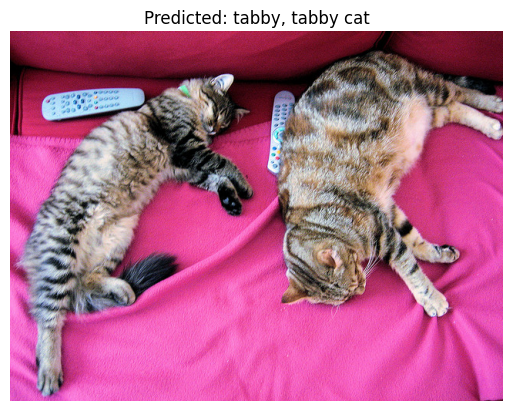

In [2]:
from transformers import AutoFeatureExtractor, CvtForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/cvt-13")
model = CvtForImageClassification.from_pretrained("microsoft/cvt-13")

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

# Отображение изображения
plt.imshow(image)
plt.title(f"Predicted: {model.config.id2label[predicted_class_idx]}")
plt.axis('off')
plt.show()

In [3]:
from google.colab import files
upload = files.upload()

Saving photo_2025-05-31_18-59-35.jpg to photo_2025-05-31_18-59-35.jpg


Predicted class: toy poodle


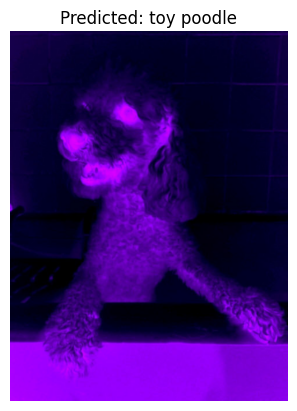

In [4]:
from io import BytesIO
# Get the filename of the uploaded image
filename = list(upload.keys())[0]

# Open the image
try:
    image = Image.open(BytesIO(upload[filename]))
except Exception as e:
    print(f"Error opening image: {e}")
    exit()

# Process the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
outputs = model(**inputs)
logits = outputs.logits

# Get the predicted class
predicted_class_idx = logits.argmax(-1).item()
predicted_class_label = model.config.id2label[predicted_class_idx]

print("Predicted class:", predicted_class_label)

# Display the image
plt.imshow(image)
plt.title(f"Predicted: {predicted_class_label}")
plt.axis('off')
plt.show()